<a href="https://colab.research.google.com/github/BorutFlis/predictor/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install fastai==1.0.61

In [ ]:
import numpy as np  
import pandas as pd
from pathlib import Path
from fastai.text import *


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
path=Path('/content/gdrive/My Drive')
df= pd.read_csv(path/'training_LM.csv', encoding='latin-1',index_col=0)

In [ ]:
df = df.iloc[np.random.permutation(len(df))]
cut1 = int(0.8 * len(df)) + 1
df_train, df_valid = df[:cut1], df[cut1:]

In [ ]:
data_lm = TextLMDataBunch.from_df(path=path, 
                                  train_df=df_train,
                                  valid_df=df_valid,
                                  label_cols="Sentiment_Score",
                                  text_cols="Tweet")

In [ ]:
data_lm.save(path/'filename.pkl')

In [ ]:
data_lm=load_data(path,'filename.pkl')

In [ ]:
lm = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [ ]:
lm.fit_one_cycle(1, 2e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.612495,4.359931,0.231282,1:13:20


In [ ]:
lm.unfreeze()
lm.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,4.170466,4.172943,0.255208,1:39:24


In [ ]:
lm.save_encoder(path/'encoder.pth')

In [ ]:
df = df.iloc[:10000,:]
df=df.iloc[np.random.permutation(len(df))]
cut1 = int(0.8 * len(df)) + 1
df_train, df_valid = df[:cut1], df[cut1:]

In [ ]:
data_clas=TextClasDataBunch.from_df(path=path,
                                    train_df=df_train,
                                    valid_df=df_valid,
                                    vocab=data_lm.train_ds.vocab,
                                    label_cols="Sentiment_Score",
                                    text_cols="Tweet")

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
clas = text_classifier_learner(data_clas,AWD_LSTM,drop_mult=0.3)

In [ ]:
clas.load_encoder(path/'encoder.pth')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (8001 items)
x: TextList
xxbos xxmaj it turns out a glass of hawaiian punch ca nt replace cake,xxbos xxmaj froze my arse off at lunch today,xxbos xxmaj is looking for anyone who 's not too busy for me right now ...,xxbos xxmaj rain - an excuse to be lazy if every i saw one . i have to go to the other half 's xxmaj dad 's for xxmaj sunday lunch though,xxbos xxunk the new transformers i think will b great
y: CategoryList
0,0,0,0,4
Path: /content/gdrive/My Drive;

Valid: LabelList (1999 items)
x: TextList
xxbos going to start eating healthy .. no more mayonnaise & & cheese sandwiches,xxbos xxmaj gosh , school is gon na xxunk soon ! i have n't done my tuition homework yet . xxmaj lazy me,xxbos xxunk xxmaj they do they really do ! xxup yay for xxmaj andy but i want xxmaj chad , damn it . xxmaj but no pressure,xxbos xxunk we miss you too girl .. hurry n come xxunk 2 us ! ! !,xxbos xxmaj yah , okay goodnite ppl of the world and good morning

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ar

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-02
Min loss divided by 10: 2.09E-02


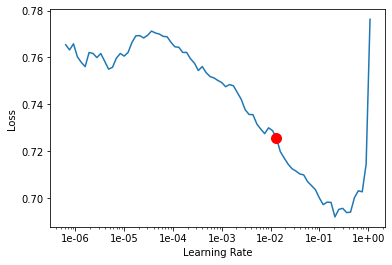

In [ ]:
clas.lr_find()
clas.recorder.plot(suggestion=True)

In [ ]:
clas.fit_one_cycle(1, 1e-2)


epoch,train_loss,valid_loss,accuracy,time
0,0.537326,0.519198,0.740370,03:04


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
clas.freeze_to(-2)
clas.fit_one_cycle(1, slice(5e-3/2., 5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.514889,0.509386,0.737369,03:13


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:

clas.fit_one_cycle(5, slice(2e-3/100, 2e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.386312,0.520266,0.759880,09:17
1,0.369453,0.524167,0.767384,08:54
2,0.287936,0.575009,0.756378,08:29
3,0.189790,0.639169,0.767884,08:06
4,0.148301,0.670154,0.764882,08:47


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ar

In [ ]:
clas.export(path/'export.pkl')

In [ ]:
lm.predict('I am not racist', n_words=20)

'I am not racist but i know you really do wah [ guys names ! Bitch , ... Um do please parents'

In [ ]:
clas.predict("I hate him")

(Category tensor(0), tensor(0), tensor([0.9541, 0.0459]))